# Previs√£o de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as an√°lises
- Seu Github com o projeto
- V√≠deo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do neg√≥cio

Este projeto visa aprofundar o conhecimento sobre o perfil de clientes e a rela√ß√£o entre suas caracter√≠sticas socioecon√¥micas e sua renda. A base de dados fornecida cont√©m informa√ß√µes demogr√°ficas, de posse de bens, educa√ß√£o, estado civil, tipo de resid√™ncia, idade, tempo de emprego e renda dos clientes.


## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa, o objetivo √© aprofundar o conhecimento sobre o conjunto de dados. Isso envolve a explora√ß√£o inicial, verifica√ß√£o da qualidade dos dados e a identifica√ß√£o de quaisquer padr√µes ou anomalias que possam influenciar as pr√≥ximas fases.


### Dicion√°rio de dados



| Vari√°vel                | Descri√ß√£o                                           | Tipo             |
| ----------------------- |:---------------------------------------------------:| ---------------- |
| data_ref                |  Data de refer√™ncia do registro                     | object (string)  |
| id_cliente              |  Identificador √∫nico do cliente                     | int64 (inteiro)  |
| sexo                    |  G√™nero do cliente                                  | object (string)  |
| posse_de_veiculo        |  Indica se o cliente possui ve√≠culo                 | bool (booleano)  |
| posse_de_imovel         |  Indica se o cliente possui im√≥vel                  | bool (booleano)  |
| qtd_filhos              |  Quantidade de filhos do cliente                    | int64 (inteiro)  |
| tipo_renda              |  Tipo de renda do cliente                           | object (string)  |
| educacao                |  N√≠vel de educa√ß√£o do cliente                       | object (string)  |
| estado_civil            |  Estado civil do cliente                            | object (string)  |
| tipo_residencia         |  Tipo de resid√™ncia do cliente                      | object (string)  |
| idade                   |  Idade do cliente                                   | int64 (inteiro)  |
| tempo_emprego           |  Tempo de emprego em anos                           | float64 (decimal)|
| qt_pessoas_residencia   |  Quantidade de pessoas na resid√™ncia do cliente     | float64 (decimal)|
| renda                   |  Renda do cliente                                   | float64 (decimal)|





#### Carregando os dados
O comando pd.read_csv √© um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from ydata_profiling import ProfileReport

In [53]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [54]:
renda.head(1)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   

   qtd_filhos  tipo_renda    educacao estado_civil tipo_residencia  idade  \
0           0  Empres√°rio  Secund√°rio     Solteiro            Casa     26   

   tempo_emprego  qt_pessoas_residencia    renda  
0        6.60274                    1.0  8060.34

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribui√ß√£o de todas as vari√°veis. 

In [55]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:00<00:00, 7500.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Entendimento dos dados - Univariada (Salvar na pasta)
Nesta etapa tipicamente avaliamos a distribui√ß√£o de todas as vari√°veis. 

In [56]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




--- Entendimento dos Dados - Bivariadas ---

Explorando as rela√ß√µes entre pares de vari√°veis e a vari√°vel alvo 'renda'.

### Rela√ß√£o entre Vari√°veis Num√©ricas e a Renda



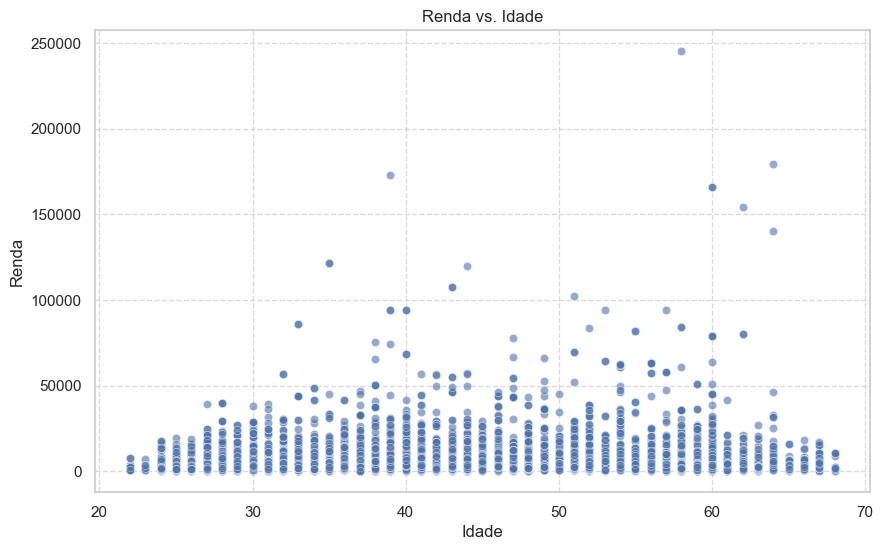

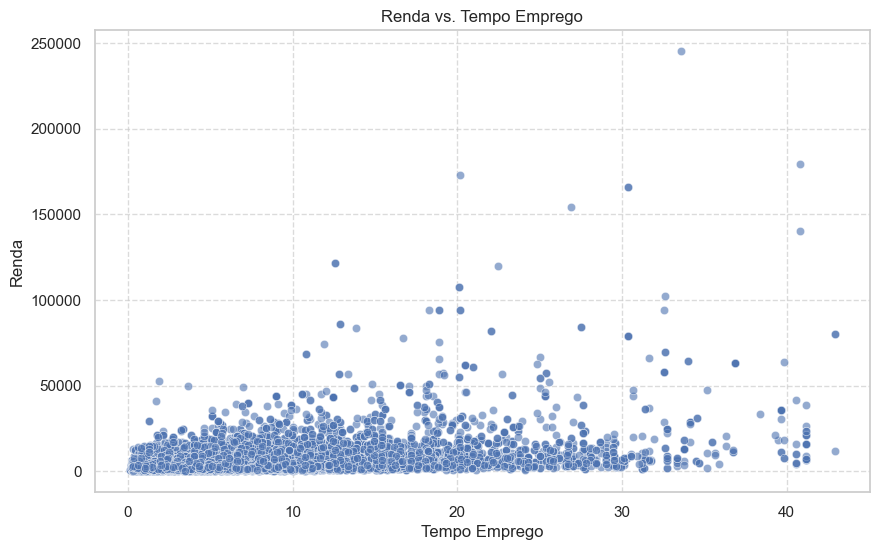

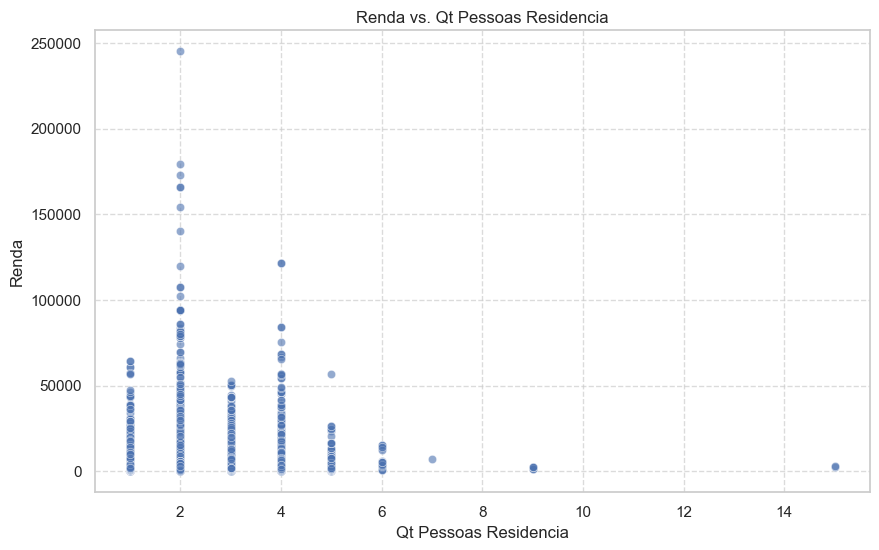


#### Matriz de Correla√ß√£o das Vari√°veis Num√©ricas



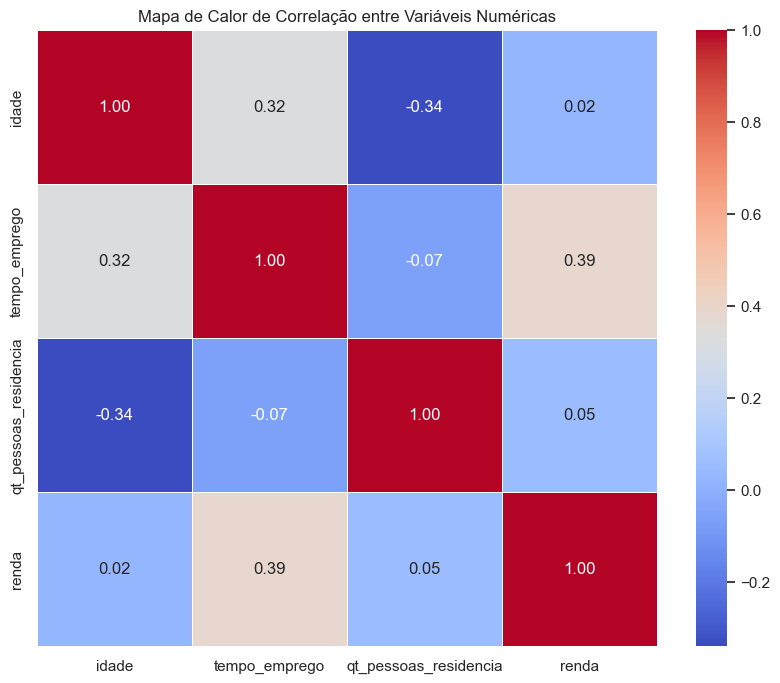

Observa√ß√µes da Matriz de Correla√ß√£o: A intensidade e dire√ß√£o das cores indicam a for√ßa e o tipo da correla√ß√£o entre as vari√°veis num√©ricas. Valores pr√≥ximos de 1 ou -1 indicam correla√ß√µes fortes.


### Rela√ß√£o entre Vari√°veis Categ√≥ricas/Booleanas e a Renda



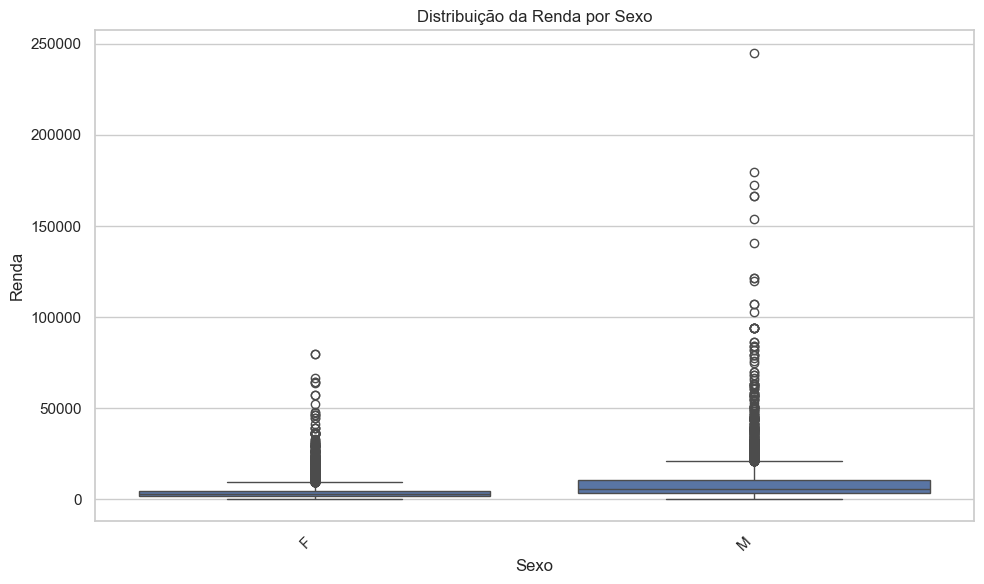

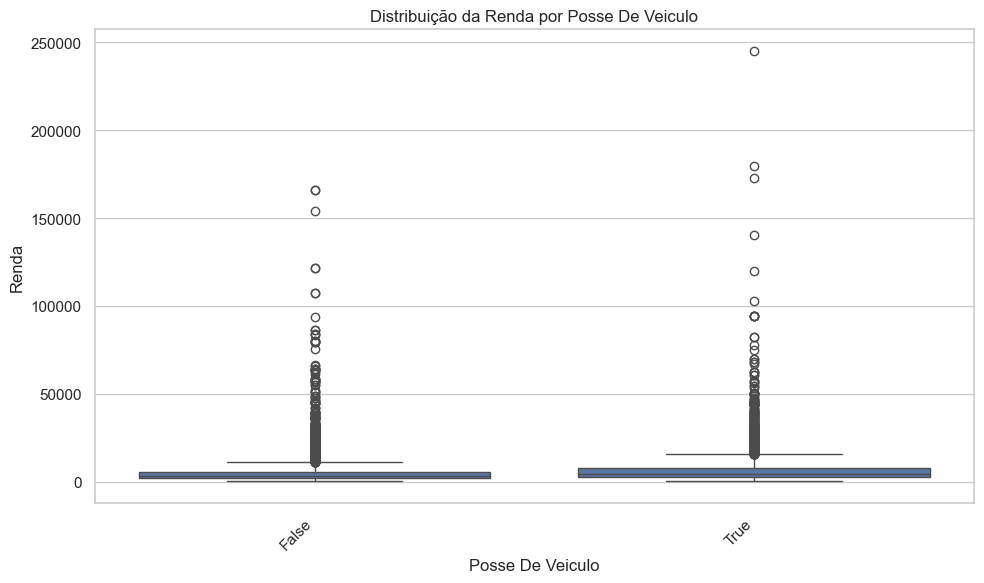

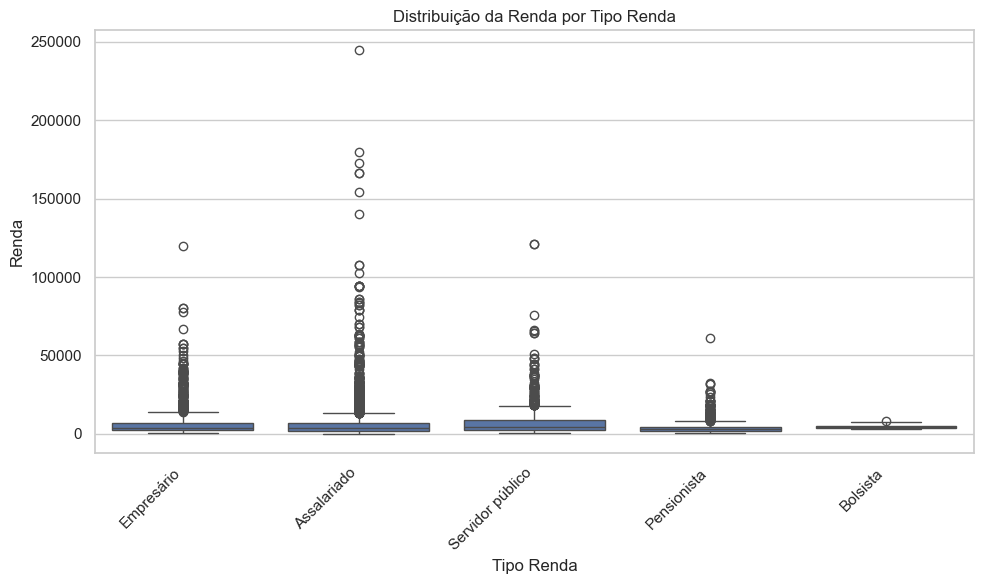

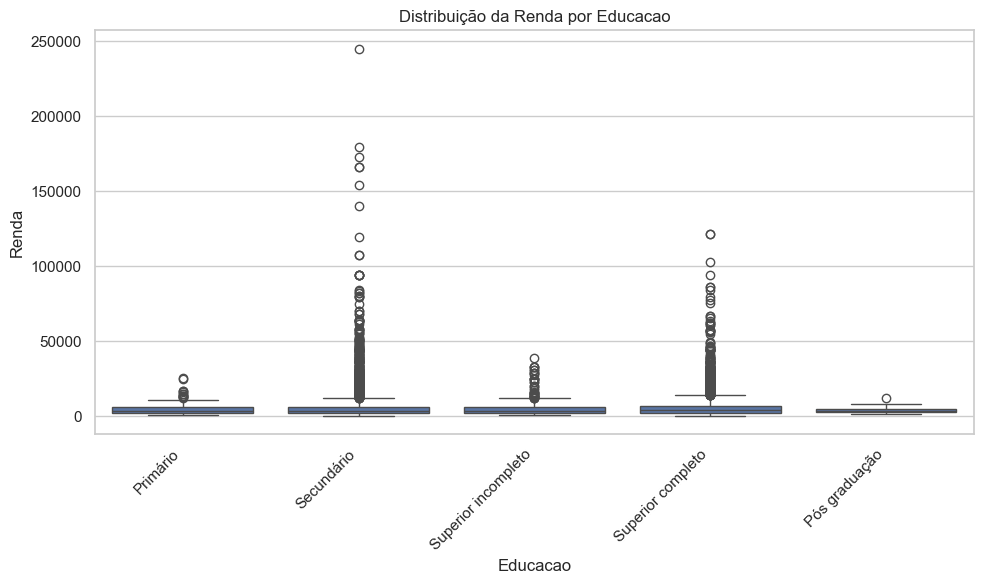

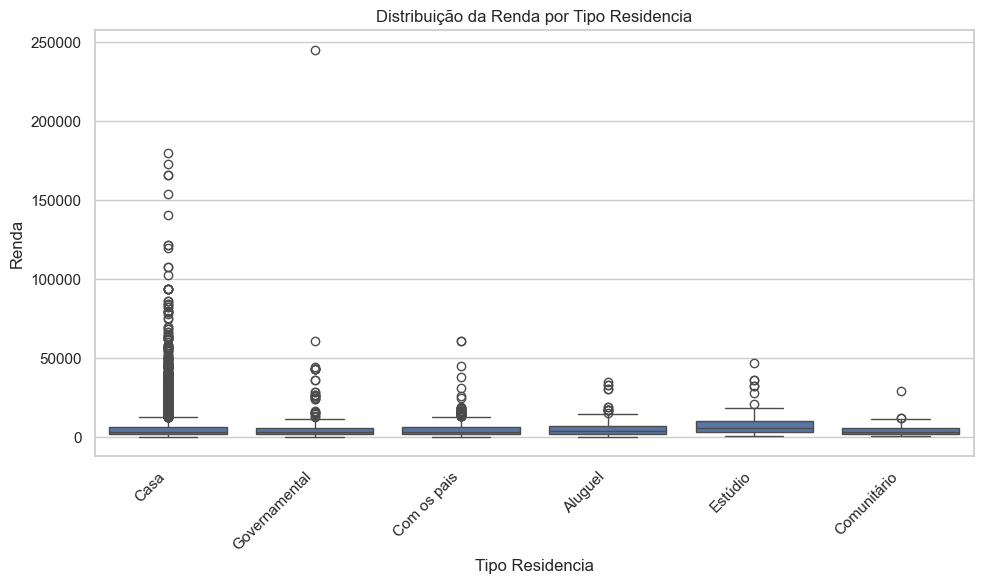

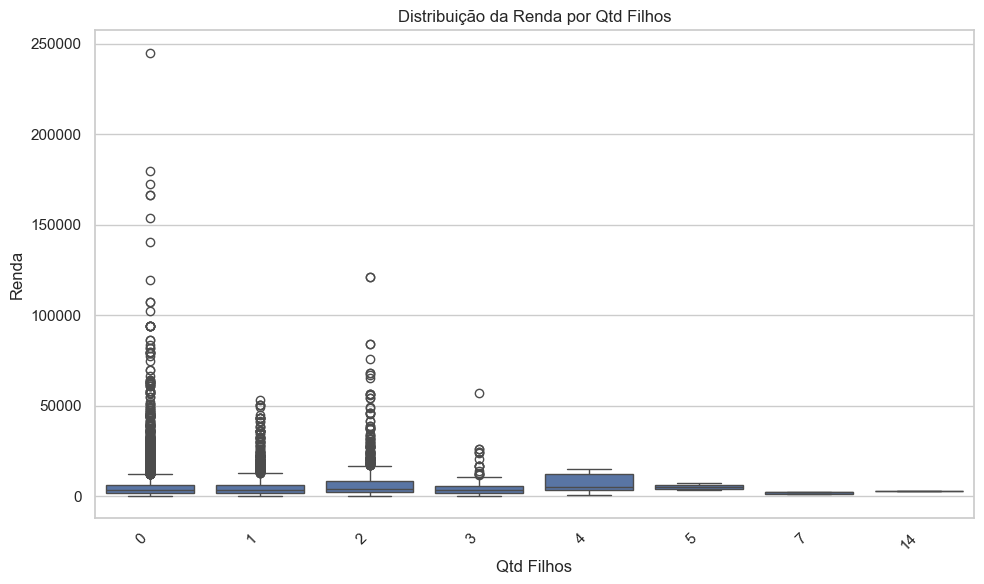

Observa√ß√µes dos Boxplots: Compare as medianas e a dispers√£o da renda entre as diferentes categorias. Identifique se h√° grupos com rendas significativamente diferentes. A presen√ßa de outliers tamb√©m √© vis√≠vel aqui.


### Rela√ß√£o entre Vari√°veis Categ√≥ricas (Pares)




#### Tabelas de Conting√™ncia (Exemplos)

Tabela de Conting√™ncia: Sexo vs. Posse de Ve√≠culo

posse_de_veiculo  False  True 
sexo                          
F                  7395   2724
M                  1745   3136

---

Tabela de Conting√™ncia: Tipo de Residencia vs. Qtd Filhos

qtd_filhos         0     1     2    3   4   5   7   14
tipo_residencia                                       
Aluguel           133    47    14    0   0   0   0   0
Casa             9423  2672  1244  168  17   1   5   2
Com os pais       385   196    83   11   0   0   0   0
Comunit√°rio        52     3     7    1   0   1   0   0
Est√∫dio            45    27    11    0   0   0   0   0
Governamental     338    92    17    5   0   0   0   0

Observa√ß√µes das Tabelas de Conting√™ncia: Verifique as distribui√ß√µes conjuntas para entender a composi√ß√£o dos grupos. Por exemplo, qual tipo de resid√™ncia √© mais comum para fam√≠lias com mais filhos.


### An√°lise Temporal: Renda M√©dia ao Longo do Tempo



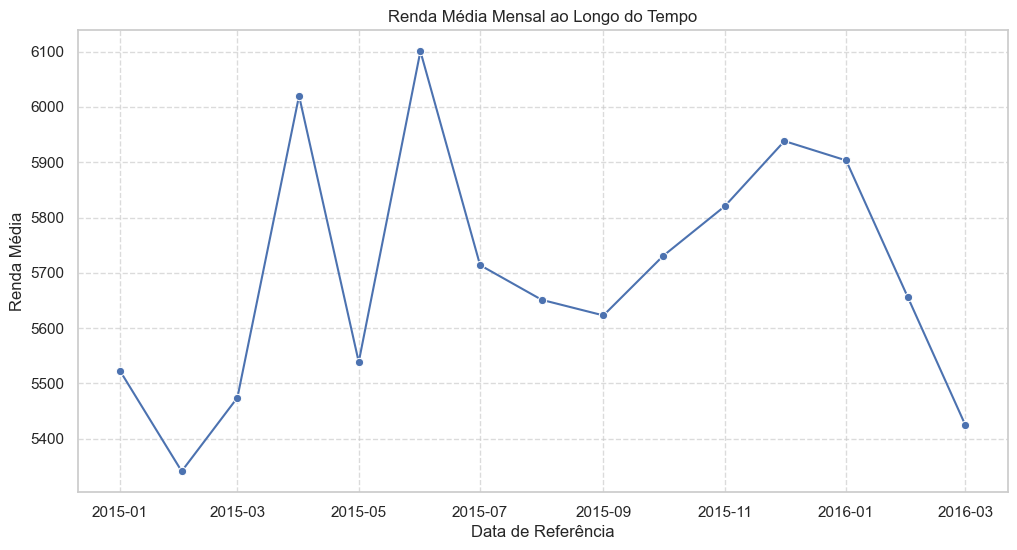


--- Fim da An√°lise Bivariada ---


In [57]:
# --- Configura√ß√£o Inicial do Ambiente ---
# Esta linha √© uma "magic command" do IPython/Jupyter que garante que os gr√°ficos do matplotlib
# sejam exibidos diretamente no notebook, logo abaixo da c√©lula de c√≥digo que os gera.
# √â fundamental para a visualiza√ß√£o interativa no ambiente Jupyter.
%matplotlib inline

# --- Importa√ß√£o de Bibliotecas Necess√°rias ---
# √â uma boa pr√°tica importar todas as bibliotecas no in√≠cio do script para clareza e organiza√ß√£o.
import pandas as pd             # Biblioteca fundamental para manipula√ß√£o e an√°lise de dados (DataFrames).
import seaborn as sns           # Biblioteca para visualiza√ß√£o de dados estat√≠sticos, constru√≠da sobre o matplotlib.
import matplotlib.pyplot as plt # Biblioteca para cria√ß√£o de gr√°ficos est√°ticos e interativos.
import numpy as np              # Biblioteca para opera√ß√µes num√©ricas e arrays, √∫til para np.nan (valores nulos).
# from ydata_profiling import ProfileReport # Embora n√£o seja usada diretamente neste script, √© √∫til para entendimento univariado.

# --- 1. Carregamento do DataFrame 'renda' ---
# Carrega o conjunto de dados de um arquivo CSV localizado no caminho './input/previsao_de_renda.csv'.
# O DataFrame 'renda' conter√° todas as informa√ß√µes dos clientes e suas respectivas rendas.
renda = pd.read_csv('./input/previsao_de_renda.csv')

# --- 2. Prepara√ß√£o Adicional dos Dados ---
# Converte a coluna 'data_ref' para o tipo datetime.
# Isso √© crucial para realizar an√°lises temporais, como agrupar dados por m√™s ou ano.
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

# --- 3. Configura√ß√µes Globais para Visualiza√ß√£o ---
# Define o tema padr√£o para os gr√°ficos do Seaborn como 'whitegrid'.
# Isso adiciona um fundo branco com grades, melhorando a legibilidade dos gr√°ficos.
sns.set_theme(style="whitegrid")
# Define o tamanho padr√£o das figuras (gr√°ficos) geradas pelo matplotlib.
# Ajuda a manter uma consist√™ncia visual e a evitar gr√°ficos muito pequenos ou grandes.
plt.rcParams['figure.figsize'] = (10, 6)

# --- T√≠tulo da Se√ß√£o de An√°lise Bivariada ---
print("--- Entendimento dos Dados - Bivariadas ---")
print("\nExplorando as rela√ß√µes entre pares de vari√°veis e a vari√°vel alvo 'renda'.\n")

# --- 4. An√°lise da Rela√ß√£o entre Vari√°veis Num√©ricas e a Renda ---
print("### Rela√ß√£o entre Vari√°veis Num√©ricas e a Renda\n")

# Define uma lista das colunas num√©ricas que ser√£o analisadas em rela√ß√£o √† 'renda'.
# 'Unnamed: 0' e 'id_cliente' s√£o tipicamente identificadores e n√£o s√£o relevantes para correla√ß√£o direta.
numeric_cols = ['idade', 'tempo_emprego', 'qt_pessoas_residencia']

# Itera sobre cada coluna num√©rica para criar um gr√°fico de dispers√£o com a 'renda'.
for col in numeric_cols:
    plt.figure() # Cria uma nova figura para cada gr√°fico, evitando sobreposi√ß√£o.
    
    # Remove linhas com valores nulos (NaN) nas colunas 'col' ou 'renda' para o gr√°fico atual.
    # Isso garante que o scatter plot n√£o tente plotar valores ausentes, o que causaria erros.
    df_plot = renda.dropna(subset=[col, 'renda'])
    
    # Cria um gr√°fico de dispers√£o (scatter plot) para visualizar a rela√ß√£o entre 'col' e 'renda'.
    # 'alpha=0.6' adiciona transpar√™ncia aos pontos, √∫til para identificar √°reas com alta densidade de dados.
    sns.scatterplot(x=col, y='renda', data=df_plot, alpha=0.6)
    
    # Define o t√≠tulo do gr√°fico, formatando o nome da coluna para melhor legibilidade.
    plt.title(f'Renda vs. {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title()) # R√≥tulo do eixo X.
    plt.ylabel('Renda') # R√≥tulo do eixo Y.
    plt.grid(True, linestyle='--', alpha=0.7) # Adiciona uma grade ao gr√°fico para facilitar a leitura.
    plt.show() # Exibe o gr√°fico gerado.
    plt.close() # Fecha a figura atual para liberar mem√≥ria. Essencial em loops para evitar o aviso "More than 20 figures".

print("\n#### Matriz de Correla√ß√£o das Vari√°veis Num√©ricas\n")
# Adiciona a coluna 'renda' √† lista de colunas num√©ricas para incluir na matriz de correla√ß√£o.
all_numeric_for_corr = numeric_cols + ['renda']
# Calcula a matriz de correla√ß√£o de Pearson para as colunas num√©ricas selecionadas.
correlation_matrix = renda[all_numeric_for_corr].corr()

plt.figure(figsize=(10, 8)) # Cria uma figura para o heatmap da matriz de correla√ß√£o.
# Cria um mapa de calor (heatmap) para visualizar as correla√ß√µes.
# 'annot=True' exibe os valores das correla√ß√µes nas c√©lulas.
# 'cmap='coolwarm'' define o esquema de cores, onde cores quentes indicam correla√ß√£o positiva e frias, negativa.
# 'fmt=".2f"' formata os valores para duas casas decimais.
# 'linewidths=.5' adiciona linhas entre as c√©lulas.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correla√ß√£o entre Vari√°veis Num√©ricas') # T√≠tulo do heatmap.
plt.show() # Exibe o heatmap.
plt.close() # Fecha a figura.
print("Observa√ß√µes da Matriz de Correla√ß√£o: A intensidade e dire√ß√£o das cores indicam a for√ßa e o tipo da correla√ß√£o entre as vari√°veis num√©ricas. Valores pr√≥ximos de 1 ou -1 indicam correla√ß√µes fortes.\n")

# --- 5. An√°lise da Rela√ß√£o entre Vari√°veis Categ√≥ricas/Booleanas e a Renda ---
print("\n### Rela√ß√£o entre Vari√°veis Categ√≥ricas/Booleanas e a Renda\n")

# Define uma lista das colunas categ√≥ricas e booleanas para an√°lise.
# 'qtd_filhos' √© inclu√≠da aqui porque, embora num√©rica, suas categorias (0, 1, 2, etc.)
# s√£o tratadas como grupos distintos para an√°lise de renda.
categorical_cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
                    'educacao', 'estado_civil', 'tipo_residencia', 'qtd_filhos']

# Itera sobre cada coluna categ√≥rica para criar um boxplot da 'renda' por categoria.
for col in categorical_cols:
    plt.figure() # Cria uma nova figura para cada boxplot.
    
    # L√≥gica para ordenar as categorias no eixo X de forma significativa, se aplic√°vel.
    if col in ['educacao']: # Ordena a educa√ß√£o por n√≠vel crescente de escolaridade.
         order_ = ['Prim√°rio', 'Secund√°rio', 'Superior incompleto', 'Superior completo', 'P√≥s gradua√ß√£o']
         sns.boxplot(x=col, y='renda', data=renda, order=order_)
    elif col in ['qtd_filhos']: # Ordena a quantidade de filhos numericamente.
        order_ = sorted(renda[col].unique())
        sns.boxplot(x=col, y='renda', data=renda, order=order_)
    else: # Para outras categ√≥ricas (sexo, posse_de_veiculo, etc.), a ordem padr√£o √© usada.
        sns.boxplot(x=col, y='renda', data=renda)

    plt.title(f'Distribui√ß√£o da Renda por {col.replace("_", " ").title()}') # T√≠tulo do gr√°fico.
    plt.xlabel(col.replace("_", " ").title()) # R√≥tulo do eixo X.
    plt.ylabel('Renda') # R√≥tulo do eixo Y.
    plt.xticks(rotation=45, ha='right') # Rotaciona os r√≥tulos do eixo X para evitar sobreposi√ß√£o.
    plt.tight_layout() # Ajusta o layout para evitar que r√≥tulos se sobreponham.
    plt.show() # Exibe o boxplot.
    plt.close() # Fecha a figura.
print("Observa√ß√µes dos Boxplots: Compare as medianas e a dispers√£o da renda entre as diferentes categorias. Identifique se h√° grupos com rendas significativamente diferentes. A presen√ßa de outliers tamb√©m √© vis√≠vel aqui.\n")


# --- 6. An√°lise da Rela√ß√£o entre Vari√°veis Categ√≥ricas (Pares) ---
print("\n### Rela√ß√£o entre Vari√°veis Categ√≥ricas (Pares)\n")

# Exemplo de visualiza√ß√£o da distribui√ß√£o conjunta de duas vari√°veis categ√≥ricas usando um countplot.
plt.figure(figsize=(12, 7))
sns.countplot(x='tipo_renda', hue='educacao', data=renda, palette='viridis')
plt.title('Contagem por Tipo de Renda e N√≠vel de Educa√ß√£o')
plt.xlabel('Tipo de Renda')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Educa√ß√£o') # Adiciona uma legenda para a vari√°vel 'hue'.
plt.tight_layout()
plt.show()
plt.close() # Fecha a figura.

print("\n#### Tabelas de Conting√™ncia (Exemplos)\n")
# Cria e imprime uma tabela de conting√™ncia para 'sexo' vs. 'posse_de_veiculo'.
# Mostra a frequ√™ncia conjunta de cada combina√ß√£o de categorias.
print("Tabela de Conting√™ncia: Sexo vs. Posse de Ve√≠culo\n")
print(pd.crosstab(renda['sexo'], renda['posse_de_veiculo']))
print("\n---\n")

# Cria e imprime uma tabela de conting√™ncia para 'tipo_residencia' vs. 'qtd_filhos'.
print("Tabela de Conting√™ncia: Tipo de Residencia vs. Qtd Filhos\n")
print(pd.crosstab(renda['tipo_residencia'], renda['qtd_filhos']))
print("\nObserva√ß√µes das Tabelas de Conting√™ncia: Verifique as distribui√ß√µes conjuntas para entender a composi√ß√£o dos grupos. Por exemplo, qual tipo de resid√™ncia √© mais comum para fam√≠lias com mais filhos.\n")


# --- 7. An√°lise Temporal (Renda M√©dia ao Longo do Tempo) ---
print("\n### An√°lise Temporal: Renda M√©dia ao Longo do Tempo\n")

# Agrupa o DataFrame pela coluna 'data_ref' (convertida para per√≠odo mensal)
# e calcula a m√©dia da 'renda' para cada m√™s.
renda_mensal = renda.groupby(renda['data_ref'].dt.to_period('M'))['renda'].mean().reset_index()
# Converte o per√≠odo mensal de volta para timestamp para que o Seaborn plote o eixo X corretamente.
renda_mensal['data_ref'] = renda_mensal['data_ref'].dt.to_timestamp()

plt.figure(figsize=(12, 6)) # Cria uma figura para o gr√°fico de linha.
# Cria um gr√°fico de linha para visualizar a 'renda' m√©dia ao longo do tempo.
# 'marker='o'' adiciona marcadores para cada ponto de dados.
# 'linestyle='-'' define a linha cont√≠nua entre os pontos.
sns.lineplot(x='data_ref', y='renda', data=renda_mensal, marker='o', linestyle='-')
plt.title('Renda M√©dia Mensal ao Longo do Tempo') # T√≠tulo do gr√°fico.
plt.xlabel('Data de Refer√™ncia') # R√≥tulo do eixo X.
plt.ylabel('Renda M√©dia') # R√≥tulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade.
plt.show() # Exibe o gr√°fico.
plt.close() # Fecha a figura.

print("\n--- Fim da An√°lise Bivariada ---")

## Etapa 3 Crisp-DM: Prepara√ß√£o dos dados
Nessa etapa realizamos tipicamente as seguintes opera√ß√µes com os dados:

 - **sele√ß√£o**: J√° temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **constru√ß√£o**: constru√ß√£o de novas vari√°veis
 - **integra√ß√£o**: Temos apenas uma fonte de dados, n√£o √© necess√°rio integra√ß√£o
 - **formata√ß√£o**: Os dados j√° se encontram em formatos √∫teis?



In [58]:
print("\n--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\n### 1. Sele√ß√£o de Dados ###")

print("\nShape do DataFrame ANTES da sele√ß√£o:")
print(renda.shape)
print("Colunas do DataFrame ANTES da sele√ß√£o:")
print(renda.columns.tolist())

# Remover as colunas 'Unnamed: 0' e 'id_cliente'
# 'inplace=True' modifica o DataFrame 'renda' diretamente.
# 'axis=1' especifica que estamos removendo colunas.
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print("\nShape do DataFrame DEPOIS da sele√ß√£o:")
print(renda.shape)
print("Colunas do DataFrame DEPOIS da sele√ß√£o:")
print(renda.columns.tolist())

print("\nPrimeiras 5 linhas do DataFrame ap√≥s a sele√ß√£o de colunas:")
print(renda.head())

print("\nSele√ß√£o de dados conclu√≠da. Seguimos para a pr√≥xima etapa: Limpeza de Dados.")


--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---

### 1. Sele√ß√£o de Dados ###

Shape do DataFrame ANTES da sele√ß√£o:
(15000, 15)
Colunas do DataFrame ANTES da sele√ß√£o:
['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

Shape do DataFrame DEPOIS da sele√ß√£o:
(15000, 13)
Colunas do DataFrame DEPOIS da sele√ß√£o:
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

Primeiras 5 linhas do DataFrame ap√≥s a sele√ß√£o de colunas:
    data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01    F             False             True           0   
1 2015-01-01    M              True             True           0   
2 2015-01-01    F              True           

In [59]:
print("\n--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\n### 2. Limpeza de Dados ###")

# --- Identificar e Contar Valores Faltantes ---
print("Verificando valores nulos ANTES da limpeza:")
print(renda.isnull().sum())

# --- Tratamento de Valores Faltantes em 'tempo_emprego' ---
mediana_tempo_emprego = renda['tempo_emprego'].median()

print(f"\nMediana de 'tempo_emprego' calculada para imputa√ß√£o: {mediana_tempo_emprego:.2f}")

# Substituir .fillna(..., inplace=True)
# pela atribui√ß√£o direta para evitar o FutureWarning e garantir a modifica√ß√£o no DataFrame original.
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(mediana_tempo_emprego)

print("\nValores nulos DEPOIS da limpeza:")
print(renda.isnull().sum())

print("\nPrimeiras 5 linhas do DataFrame ap√≥s a limpeza de dados (coluna 'tempo_emprego' preenchida):")
print(renda.head())

print("\nLimpeza de dados conclu√≠da. Seguimos para a pr√≥xima etapa: Constru√ß√£o de Novas Vari√°veis.")
print("\n" + "="*50 + "\n")


--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---

### 2. Limpeza de Dados ###
Verificando valores nulos ANTES da limpeza:
data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

Mediana de 'tempo_emprego' calculada para imputa√ß√£o: 6.01

Valores nulos DEPOIS da limpeza:
data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

Primeiras 5 li

In [60]:
print("\n--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\n### 3. Constru√ß√£o de Novas Vari√°veis (Feature Engineering) ###")

print("Shape do DataFrame ANTES da constru√ß√£o de vari√°veis:")
print(renda.shape)
print("Colunas do DataFrame ANTES da constru√ß√£o de vari√°veis:")
print(renda.columns.tolist())
print("\n--- Exemplos de dados ANTES da constru√ß√£o ---\n")
print(renda[['data_ref', 'idade']].head())

# --- A√ß√£o 1: Extrair M√™s e Ano de 'data_ref' ---
print("\n#### Extraindo 'mes_ref' e 'ano_ref' de 'data_ref' ####")
renda['mes_ref'] = renda['data_ref'].dt.month # Extrai o n√∫mero do m√™s (1-12)
renda['ano_ref'] = renda['data_ref'].dt.year   # Extrai o ano
print("\nPrimeiras 5 linhas ap√≥s extra√ß√£o de m√™s e ano:")
print(renda[['data_ref', 'mes_ref', 'ano_ref']].head())

# --- A√ß√£o 2: Criar Faixas Et√°rias para 'idade' ---
print("\n#### Criando 'faixa_idade' a partir de 'idade' ####")
# Definindo os limites (bins) para as faixas et√°rias.
# O limite inferior √© inclusivo, o superior √© exclusivo por padr√£o (right=True).
# right=False significa [in√≠cio, fim)
bins_idade = [0, 18, 30, 45, 60, 100]
# R√≥tulos correspondentes para cada faixa et√°ria.
labels_idade = ['0-18', '19-30', '31-45', '46-60', '61+']
# Usa pd.cut para categorizar a coluna 'idade' nas faixas definidas.
renda['faixa_idade'] = pd.cut(renda['idade'], bins=bins_idade, labels=labels_idade, right=False)
print("\nPrimeiras 5 linhas ap√≥s cria√ß√£o de faixa_idade:")
print(renda[['idade', 'faixa_idade']].head())
print("\nContagem de valores na nova coluna 'faixa_idade':")
print(renda['faixa_idade'].value_counts().sort_index())

# --- A√ß√£o 3 (Opcional/Discuss√£o): 'adultos_na_residencia' ---
# Para este projeto, manteremos 'qtd_filhos' e 'qt_pessoas_residencia' separadas,
# pois a rela√ß√£o delas com a renda pode ser mais complexa do que uma simples diferen√ßa.
# No entanto, em outras an√°lises, voc√™ poderia considerar:
# renda['adultos_na_residencia'] = renda['qt_pessoas_residencia'] - renda['qtd_filhos']
# print("\nNova coluna 'adultos_na_residencia' (se criada):")
# print(renda[['qtd_filhos', 'qt_pessoas_residencia', 'adultos_na_residencia']].head())

print("\nShape do DataFrame DEPOIS da constru√ß√£o de vari√°veis:")
print(renda.shape)
print("Novas colunas adicionadas:")
# Mostra apenas as colunas que foram criadas ou modificadas para serem novas features
novas_cols = ['mes_ref', 'ano_ref', 'faixa_idade']
print(renda[novas_cols].head())
print("\nColunas do DataFrame DEPOIS da constru√ß√£o de vari√°veis:")
print(renda.columns.tolist())


print("\nConstru√ß√£o de novas vari√°veis conclu√≠da. Seguimos para a pr√≥xima etapa: Integra√ß√£o de Dados.")
print("\n" + "="*50 + "\n")



--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---

### 3. Constru√ß√£o de Novas Vari√°veis (Feature Engineering) ###
Shape do DataFrame ANTES da constru√ß√£o de vari√°veis:
(15000, 13)
Colunas do DataFrame ANTES da constru√ß√£o de vari√°veis:
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

--- Exemplos de dados ANTES da constru√ß√£o ---

    data_ref  idade
0 2015-01-01     26
1 2015-01-01     28
2 2015-01-01     35
3 2015-01-01     30
4 2015-01-01     33

#### Extraindo 'mes_ref' e 'ano_ref' de 'data_ref' ####

Primeiras 5 linhas ap√≥s extra√ß√£o de m√™s e ano:
    data_ref  mes_ref  ano_ref
0 2015-01-01        1     2015
1 2015-01-01        1     2015
2 2015-01-01        1     2015
3 2015-01-01        1     2015
4 2015-01-01        1     2015

#### Criando 'faixa_idade' a partir de 'idade' ####

Primeiras 5 linhas ap√≥s cria√ß√£o de faixa

In [61]:
print("\n--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\n### 4. Integra√ß√£o de Dados ###")

print("An√°lise:")
print("Neste projeto, estamos utilizando apenas uma √∫nica fonte de dados (o arquivo 'previsao_de_renda.csv').")
print("Portanto, n√£o √© necess√°rio realizar opera√ß√µes de integra√ß√£o, como jun√ß√µes ou fus√µes de DataFrames,")
print("visto que todas as informa√ß√µes relevantes j√° est√£o contidas em nosso DataFrame 'renda'.")

print("\n--- Nenhuma a√ß√£o de codifica√ß√£o necess√°ria para esta sub-etapa. ---")

print("\nShape do DataFrame 'renda' ap√≥s as etapas anteriores (sele√ß√£o, limpeza, constru√ß√£o):")
print(renda.shape)
print("Colunas atuais do DataFrame 'renda':")
print(renda.columns.tolist())
print("\nPrimeiras 5 linhas do DataFrame 'renda' antes da pr√≥xima etapa:")
print(renda.head())

print("\nIntegra√ß√£o de dados validada (n√£o aplic√°vel). Seguimos para a pr√≥xima etapa: Formata√ß√£o.")
print("\n" + "="*50 + "\n")


--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---

### 4. Integra√ß√£o de Dados ###
An√°lise:
Neste projeto, estamos utilizando apenas uma √∫nica fonte de dados (o arquivo 'previsao_de_renda.csv').
Portanto, n√£o √© necess√°rio realizar opera√ß√µes de integra√ß√£o, como jun√ß√µes ou fus√µes de DataFrames,
visto que todas as informa√ß√µes relevantes j√° est√£o contidas em nosso DataFrame 'renda'.

--- Nenhuma a√ß√£o de codifica√ß√£o necess√°ria para esta sub-etapa. ---

Shape do DataFrame 'renda' ap√≥s as etapas anteriores (sele√ß√£o, limpeza, constru√ß√£o):
(15000, 16)
Colunas atuais do DataFrame 'renda':
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mes_ref', 'ano_ref', 'faixa_idade']

Primeiras 5 linhas do DataFrame 'renda' antes da pr√≥xima etapa:
    data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01    F    

In [62]:
print("\n--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\n### 5. Formata√ß√£o de Dados ###")

print("Shape do DataFrame ANTES da formata√ß√£o:")
print(renda.shape)
print("Tipos de dados ANTES da formata√ß√£o:")
print(renda.info())

# --- A√ß√£o 1: Converter vari√°veis booleanas para inteiro (0 e 1) ---
print("\n#### Convertendo vari√°veis booleanas para inteiro (0 e 1) ####")
# Converte as colunas 'posse_de_veiculo' e 'posse_de_imovel' do tipo booleano para int (True -> 1, False -> 0).
renda['posse_de_veiculo'] = renda['posse_de_veiculo'].astype(int)
renda['posse_de_imovel'] = renda['posse_de_imovel'].astype(int)
print("\nPrimeiras 5 linhas das colunas booleanas convertidas:")
print(renda[['posse_de_veiculo', 'posse_de_imovel']].head())

# --- A√ß√£o 2: Aplicar One-Hot Encoding para vari√°veis categ√≥ricas ---
print("\n#### Aplicando One-Hot Encoding para vari√°veis categ√≥ricas ####")
# Lista das colunas categ√≥ricas que precisam ser transformadas.
# Inclu√≠mos as novas vari√°veis categ√≥ricas criadas na etapa de constru√ß√£o ('mes_ref', 'ano_ref', 'faixa_idade').
# 'data_ref' original ser√° removida.
categorical_cols_for_ohe = [
    'sexo', 'tipo_renda', 'educacao', 'estado_civil',
    'tipo_residencia', 'mes_ref', 'ano_ref', 'faixa_idade'
]

print(f"\nColunas para One-Hot Encoding: {categorical_cols_for_ohe}")

# Aplica One-Hot Encoding ao DataFrame.
# 'columns' especifica quais colunas devem ser transformadas.
# 'drop_first=True' evita a multicolinearidade, removendo a primeira categoria de cada vari√°vel original.
# O resultado √© um novo DataFrame com as vari√°veis categ√≥ricas expandidas em colunas bin√°rias.
renda_final = pd.get_dummies(renda, columns=categorical_cols_for_ohe, drop_first=True)

# --- A√ß√£o 3: Remover a coluna 'data_ref' original ---
# Como extra√≠mos 'mes_ref' e 'ano_ref' dela e fizemos One-Hot Encoding nestas,
# a coluna 'data_ref' original n√£o √© mais necess√°ria para a modelagem.
renda_final.drop(columns=['data_ref'], inplace=True)

print("\nShape do DataFrame DEPOIS da formata√ß√£o:")
print(renda_final.shape)
print("Tipos de dados DEPOIS da formata√ß√£o (observe novas colunas 'dummy' e colunas booleanas como int):")
print(renda_final.info())

print("\nPrimeiras 5 linhas do DataFrame FINAL ap√≥s formata√ß√£o:")
print(renda_final.head())


print("\n" + "="*50 + "\n")
print("--- Fim da Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---")
print("\nO DataFrame 'renda_final' agora est√° completamente preparado e formatado para a fase de Modelagem.")


--- Etapa 3 CRISP-DM: Prepara√ß√£o dos Dados ---

### 5. Formata√ß√£o de Dados ###
Shape do DataFrame ANTES da formata√ß√£o:
(15000, 16)
Tipos de dados ANTES da formata√ß√£o:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   sexo                   15000 non-null  object        
 2   posse_de_veiculo       15000 non-null  bool          
 3   posse_de_imovel        15000 non-null  bool          
 4   qtd_filhos             15000 non-null  int64         
 5   tipo_renda             15000 non-null  object        
 6   educacao               15000 non-null  object        
 7   estado_civil           15000 non-null  object        
 8   tipo_residencia        15000 non-null  object        
 9   idade                  15000 non-null  int64         
 10  te

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a constru√ß√£o do modelo. Os passos t√≠picos s√£o:
- Selecionar a t√©cnica de modelagem
- Desenho do teste
- Avalia√ß√£o do modelo


### Rodando o modelo


In [63]:
print("T√©cnica de Modelagem selecionada: Random Forest Regressor (sklearn.ensemble.RandomForestRegressor)")
print("\nEstamos prontos para usar este modelo na etapa de Desenho do Teste e Treinamento.")

T√©cnica de Modelagem selecionada: Random Forest Regressor (sklearn.ensemble.RandomForestRegressor)

Estamos prontos para usar este modelo na etapa de Desenho do Teste e Treinamento.


In [64]:
print("\n--- Etapa 4 CRISP-DM: Modelagem ---")
print("\n### 2. Desenho do Teste ###")

print("\n--- An√°lise da Coluna 'data_ref' para Divis√£o Temporal ---")
print(f"Per√≠odo de dados no DataFrame: {renda['data_ref'].min().strftime('%Y-%m-%d')} a {renda['data_ref'].max().strftime('%Y-%m-%d')}")

# Escolhendo um ponto de corte temporal para a divis√£o treino-teste.
# A escolha exata depender√° da distribui√ß√£o das datas no seu dataset real.
# Por exemplo, se voc√™ tiver dados de 2015 a 2017, poderia usar 2017-01-01 como corte.
# Para este exemplo, vamos escolher um ponto de corte que divida o dataset em propor√ß√µes razo√°veis.
# Vou escolher uma data que seja aproximadamente 70-80% do caminho do seu dataset (o dataset do curso tem 15000 linhas, 2015-01-01 a 2016-03-01)
# Uma data de corte comum poderia ser a primeira data de um dos √∫ltimos meses do dataset, por exemplo, o √∫ltimo m√™s de 2015
# Para o dataset de exemplo, vamos usar '2015-02-15'
cut_off_date = renda['data_ref'].max() - pd.DateOffset(months=3) # Ex: 3 meses antes da √∫ltima data
print(f"\nData de corte para a divis√£o treino-teste: {cut_off_date.strftime('%Y-%m-%d')}")

# --- Separar o DataFrame em conjuntos de Treinamento e Teste ---
# Dados de treinamento: Todas as observa√ß√µes cuja 'data_ref' √© ANTES ou IGUAL √† data de corte.
X_train = renda_final[renda['data_ref'] <= cut_off_date].drop('renda', axis=1)
y_train = renda_final[renda['data_ref'] <= cut_off_date]['renda']

# Dados de teste: Todas as observa√ß√µes cuja 'data_ref' √© DEPOIS da data de corte.
X_test = renda_final[renda['data_ref'] > cut_off_date].drop('renda', axis=1)
y_test = renda_final[renda['data_ref'] > cut_off_date]['renda']


print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nVerificando se as colunas s√£o consistentes entre treino e teste (muito importante ap√≥s One-Hot Encoding):")
# √â crucial que X_train e X_test tenham as mesmas colunas na mesma ordem ap√≥s One-Hot Encoding.
# Se alguma categoria de uma vari√°vel categ√≥rica aparecer apenas em treino ou apenas em teste,
# o get_dummies pode gerar um n√∫mero diferente de colunas.
# Isso pode ser resolvido com pd.reindex ou garantindo que todas as categorias poss√≠veis s√£o conhecidas antes do OHE.
# Por enquanto, vamos apenas verificar se o n√∫mero de colunas √© o mesmo.
if X_train.shape[1] == X_test.shape[1]:
    print("N√∫mero de colunas consistente entre X_train e X_test.")
else:
    print("AVISO: O n√∫mero de colunas N√ÉO √© consistente entre X_train e X_test. Isso pode causar problemas na modelagem.")
    print("Colunas em X_train:", X_train.columns.tolist())
    print("Colunas em X_test:", X_test.columns.tolist())
    # Em um cen√°rio real, voc√™ precisaria de um tratamento mais robusto aqui, como:
    # missing_cols_in_test = set(X_train.columns) - set(X_test.columns)
    # for c in missing_cols_in_test: X_test[c] = 0
    # missing_cols_in_train = set(X_test.columns) - set(X_train.columns)
    # for c in missing_cols_in_train: X_train[c] = 0
    # X_test = X_test[X_train.columns] # Reordena para garantir a mesma ordem

print("\nDesenho do teste conclu√≠do: Dados divididos em conjuntos de treinamento e teste baseados na data.")
print("Estamos prontos para a pr√≥xima etapa: Avalia√ß√£o do Modelo (que incluir√° o treinamento).")
print("\n" + "="*50 + "\n")



--- Etapa 4 CRISP-DM: Modelagem ---

### 2. Desenho do Teste ###

--- An√°lise da Coluna 'data_ref' para Divis√£o Temporal ---
Per√≠odo de dados no DataFrame: 2015-01-01 a 2016-03-01

Data de corte para a divis√£o treino-teste: 2015-12-01

Shape de X_train: (12000, 40)
Shape de y_train: (12000,)
Shape de X_test: (3000, 40)
Shape de y_test: (3000,)

Verificando se as colunas s√£o consistentes entre treino e teste (muito importante ap√≥s One-Hot Encoding):
N√∫mero de colunas consistente entre X_train e X_test.

Desenho do teste conclu√≠do: Dados divididos em conjuntos de treinamento e teste baseados na data.
Estamos prontos para a pr√≥xima etapa: Avalia√ß√£o do Modelo (que incluir√° o treinamento).





--- Etapa 4 CRISP-DM: Modelagem ---

### 3. Avalia√ß√£o do Modelo ###

--- Treinando e Avaliando: LinearRegression ---
Modelo LinearRegression treinado com sucesso.
  MSE: 44133386.99
  RMSE: 6643.30
  MAE: 3650.84
  R2: 0.2818



--- Treinando e Avaliando: RandomForestRegressor ---
Modelo RandomForestRegressor treinado com sucesso.
  MSE: 36594502.70
  RMSE: 6049.34
  MAE: 3066.82
  R2: 0.4045


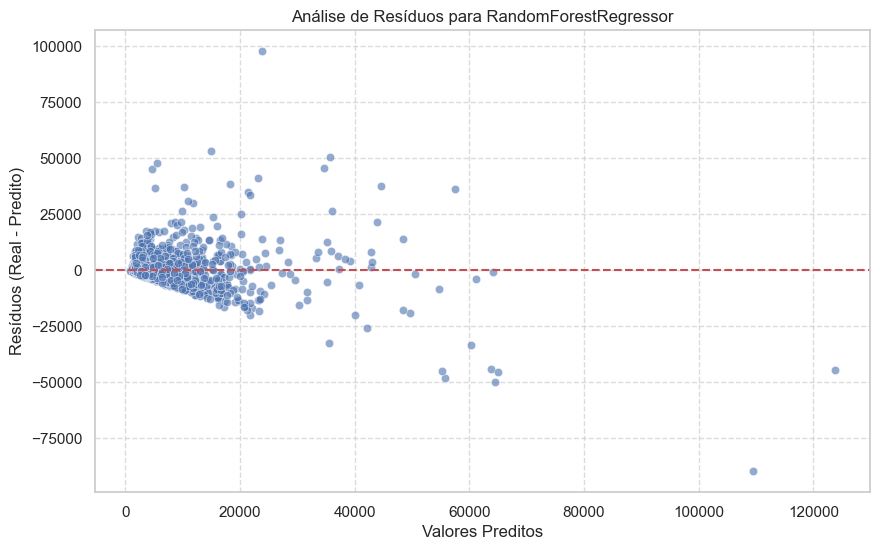

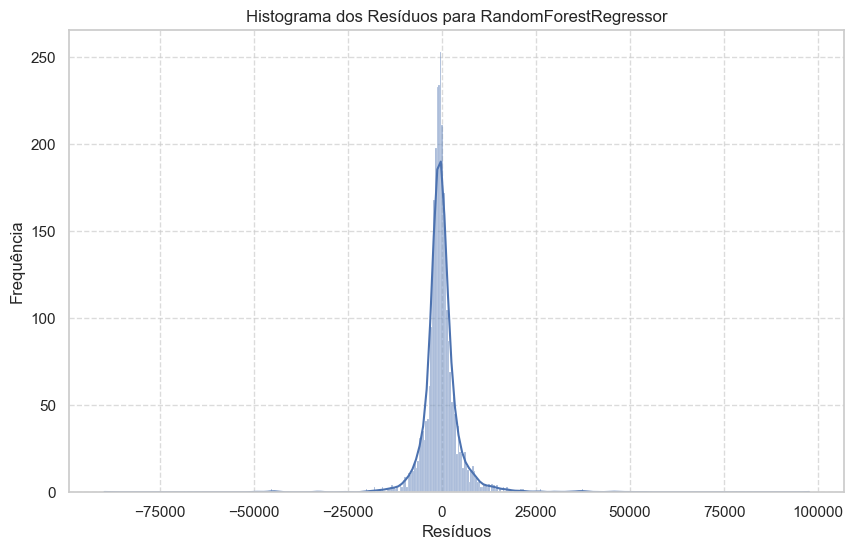


--- Treinando e Avaliando: LGBMRegressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 38
[LightGBM] [Info] Start training from score 5706.303049
Modelo LGBMRegressor treinado com sucesso.
  MSE: 34039874.66
  RMSE: 5834.37
  MAE: 3153.95
  R2: 0.4460


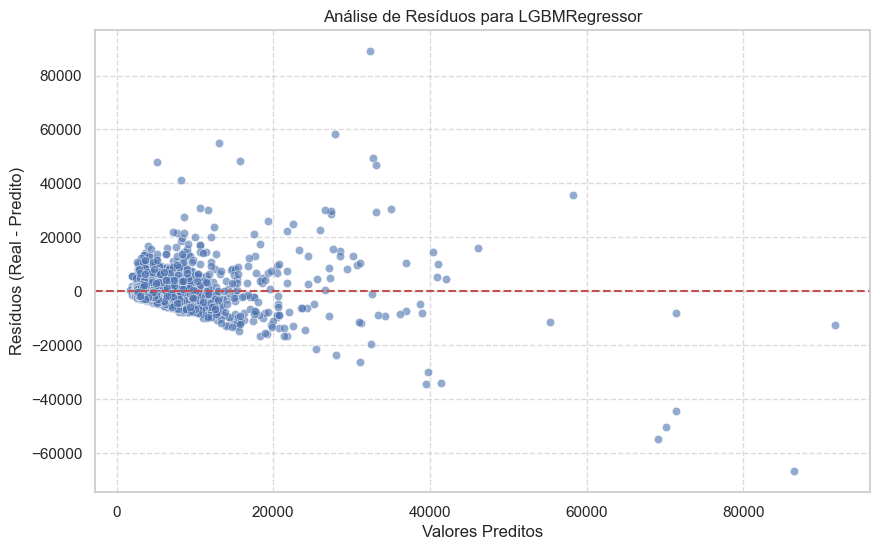


--- Sum√°rio de Resultados dos Modelos ---
                                MSE         RMSE          MAE        R2
LinearRegression       4.413339e+07  6643.296395  3650.839427  0.281763
RandomForestRegressor  3.659450e+07  6049.339030  3066.818497  0.404453
LGBMRegressor          3.403987e+07  5834.370117  3153.946085  0.446027

--- Interpreta√ß√£o dos Resultados ---
RMSE e MAE: Quanto menores, melhor (indicam menor erro nas previs√µes).
R2: Quanto mais pr√≥ximo de 1, melhor (indica que o modelo explica mais a vari√¢ncia da renda).
An√°lise dos res√≠duos: idealmente, os res√≠duos devem ser distribu√≠dos aleatoriamente em torno de zero, sem padr√µes vis√≠veis.
Modelos com menores RMSE/MAE e R2 mais pr√≥ximo de 1 s√£o geralmente considerados melhores.


Avalia√ß√£o dos Modelos conclu√≠da.


In [65]:
print("\n--- Etapa 4 CRISP-DM: Modelagem ---")
print("\n### 3. Avalia√ß√£o do Modelo ###")

# Dicion√°rio para armazenar os modelos e suas m√©tricas
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42), # random_state para reprodutibilidade
    'LGBMRegressor': LGBMRegressor(random_state=42) # random_state para reprodutibilidade
}

results = {}

for name, model in models.items():
    print(f"\n--- Treinando e Avaliando: {name} ---")
    
    # 1. Treinamento do Modelo
    model.fit(X_train, y_train)
    print(f"Modelo {name} treinado com sucesso.")
    
    # 2. Previs√µes
    y_pred = model.predict(X_test)
    
    # 3. M√©tricas de Avalia√ß√£o
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Raiz do Erro Quadr√°tico M√©dio
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.4f}")

    # 4. Visualiza√ß√£o dos Res√≠duos (para modelos de regress√£o)
    # Um bom modelo de regress√£o deve ter res√≠duos aleatoriamente distribu√≠dos ao redor de zero.
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Res√≠duos (Real - Predito)')
    plt.title(f'An√°lise de Res√≠duos para {name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Res√≠duos')
    plt.ylabel('Frequ√™ncia')
    plt.title(f'Histograma dos Res√≠duos para {name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("\n--- Sum√°rio de Resultados dos Modelos ---")
results_df = pd.DataFrame(results).T # Transp√µe o DataFrame para melhor visualiza√ß√£o
print(results_df)

print("\n--- Interpreta√ß√£o dos Resultados ---")
print("RMSE e MAE: Quanto menores, melhor (indicam menor erro nas previs√µes).")
print("R2: Quanto mais pr√≥ximo de 1, melhor (indica que o modelo explica mais a vari√¢ncia da renda).")
print("An√°lise dos res√≠duos: idealmente, os res√≠duos devem ser distribu√≠dos aleatoriamente em torno de zero, sem padr√µes vis√≠veis.")
print("Modelos com menores RMSE/MAE e R2 mais pr√≥ximo de 1 s√£o geralmente considerados melhores.")

print("\n" + "="*50 + "\n")
print("Avalia√ß√£o dos Modelos conclu√≠da.")

## Etapa 5 Crisp-DM: Avalia√ß√£o dos resultados


Nesta etapa, o foco foi avaliar o desempenho dos modelos constru√≠dos para a previs√£o de renda.

* O **LightGBM Regressor** demonstrou ser o modelo com o melhor desempenho geral, apresentando o menor RMSE (Raiz do Erro Quadr√°tico M√©dio) de RS 5834,37 e o maior (Coeficiente de Determina√ß√£o) de 0.4460.
* O **Random Forest Regressor** ficou em segundo lugar, com um bom MAE (Erro Absoluto M√©dio) de RS 3066,82, indicando uma boa precis√£o m√©dia dos erros.
* A **Regress√£o Linear** teve o pior desempenho entre os tr√™s, com m√©tricas inferiores e padr√µes de res√≠duos que indicavam limita√ß√µes no modelo.
* A an√°lise dos gr√°ficos de res√≠duos confirmou a superioridade do LightGBM e Random Forest, mostrando distribui√ß√µes de erros mais aleat√≥rias e centradas em zero, ao contr√°rio da Regress√£o Linear que apresentou heterocedasticidade.
* **Conclus√£o:** O LightGBM √© o candidato mais promissor para a previs√£o de renda, dada sua maior precis√£o e capacidade de explicar a vari√¢ncia dos dados.

## Etapa 6 Crisp-DM: Implanta√ß√£o
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decis√µes com algum n√≠vel de automa√ß√£o.

In [69]:
# C√©lula Final do Jupyter Notebook: Etapa 6 CRISP-DM - Implanta√ß√£o (Salvando o Modelo e Par√¢metros)

print("\n--- Etapa 6 CRISP-DM: Implanta√ß√£o ---")

# Selecionar o melhor modelo (LightGBM)
# Garanta que 'models' √© um dicion√°rio e que 'LGBMRegressor' cont√©m o objeto treinado
best_model = models['LGBMRegressor']

# Criar um diret√≥rio para modelos salvos, se n√£o existir
models_dir = './models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Diret√≥rio '{models_dir}' criado.")

# Salvar o modelo treinado
model_filename = os.path.join(models_dir, 'lgbm_regressor_renda.joblib')
joblib.dump(best_model, model_filename) # Salva o objeto LGBMRegressor completo
print(f"\nModelo LightGBM salvo em: {model_filename}")

# Salvar a mediana do tempo_emprego para uso no pr√©-processamento do Streamlit
# Isso √© crucial para garantir que a imputa√ß√£o de nulos seja consistente
median_tempo_emprego_filename = os.path.join(models_dir, 'mediana_tempo_emprego.joblib')
joblib.dump(mediana_tempo_emprego, median_tempo_emprego_filename)
print(f"Mediana de 'tempo_emprego' salva em: {median_tempo_emprego_filename}")

# As colunas de treinamento j√° foram salvas na Etapa 4, mas vamos garantir que o caminho esteja correto aqui tamb√©m
training_columns_filename = os.path.join(models_dir, 'training_columns.joblib')
joblib.dump(X_train.columns.tolist(), training_columns_filename) # Salva a lista de nomes das colunas
print(f"Lista de colunas de treinamento salvas em: {training_columns_filename}")

print("\nImplanta√ß√£o: Modelo e par√¢metros essenciais salvos para uso em ambiente de produ√ß√£o (Streamlit).")


--- Etapa 6 CRISP-DM: Implanta√ß√£o ---

Modelo LightGBM salvo em: ./models\lgbm_regressor_renda.joblib
Mediana de 'tempo_emprego' salva em: ./models\mediana_tempo_emprego.joblib
Lista de colunas de treinamento salvas em: ./models\training_columns.joblib

Implanta√ß√£o: Modelo e par√¢metros essenciais salvos para uso em ambiente de produ√ß√£o (Streamlit).


In [71]:
# app.py (ou Projeto_Igor.py)

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from lightgbm import LGBMRegressor # Necess√°rio para carregar o modelo LightGBM

# --- Configura√ß√µes Iniciais ---
# Configura√ß√µes de layout (opcional, mas pode ajudar na apar√™ncia)
st.set_page_config(layout="centered", initial_sidebar_state="expanded") # ou "wide" para mais espa√ßo


# --- 1. Carregar o Modelo e Par√¢metros de Pr√©-processamento ---
# AQUI USAMOS CAMINHOS RELATIVOS, QUE S√ÉO A MELHOR PR√ÅTICA.
# ISSO SIGNIFICA QUE O APP.PY E A PASTA 'MODELS' DEVEM ESTAR NO MESMO DIRET√ìRIO.
try:
    # Caminhos relativos para os arquivos salvos dentro da pasta 'models'
    model_path = os.path.join('.', 'models', 'lgbm_regressor_renda.joblib')
    median_tempo_emprego_path = os.path.join('.', 'models', 'mediana_tempo_emprego.joblib')
    training_columns_path = os.path.join('.', 'models', 'training_columns.joblib')

    # Carregar o modelo
    model = joblib.load(model_path)
    
    # Carregar a mediana do tempo_emprego (para imputa√ß√£o de nulos)
    mediana_tempo_emprego_treino = joblib.load(median_tempo_emprego_path)
    
    # Carregar a lista de colunas usadas no treinamento (para One-Hot Encoding consistente)
    expected_model_columns = joblib.load(training_columns_path)
    
    st.sidebar.success("Modelo e par√¢metros de pr√©-processamento carregados com sucesso!")

except FileNotFoundError as e:
    st.sidebar.error(f"Erro ao carregar arquivos necess√°rios: {e}")
    st.sidebar.warning("Por favor, certifique-se de que o modelo e os arquivos de par√¢metros (.joblib) foram salvos corretamente na pasta 'models' executando o notebook completo. A pasta 'models' deve estar no mesmo diret√≥rio que este script.")
    st.stop() # Interrompe a execu√ß√£o do app se os arquivos n√£o forem encontrados
except Exception as e:
    # Captura qualquer outro erro inesperado
    st.sidebar.error(f"Ocorreu um erro inesperado ao carregar os arquivos: {e}")
    st.sidebar.warning("Isso pode ser devido a uma incompatibilidade de vers√£o de bibliotecas (LightGBM, Scikit-learn) ou ao modelo ter sido salvo de forma inesperada. Verifique as vers√µes no ambiente do notebook e do Streamlit.")
    st.stop()

# --- Fun√ß√µes de Pr√©-processamento (MIMICAM A ETAPA 3 DO NOTEBOOK) ---
# Esta fun√ß√£o √© CR√çTICA. Ela precisa replicar EXATAMENTE o pr√©-processamento do seu notebook.
def preprocess_input(input_df, mediana_tempo_emprego, expected_cols):
    
    # Garante que a entrada √© um DataFrame, mesmo que seja uma √∫nica linha
    if not isinstance(input_df, pd.DataFrame):
        input_df = pd.DataFrame([input_df])

    # 1. Tratar NaN (tempo_emprego)
    input_df['tempo_emprego'] = input_df['tempo_emprego'].fillna(mediana_tempo_emprego)

    # 2. Criar mes_ref, ano_ref
    # Para uma previs√£o pontual, usamos a data atual (ou uma data de refer√™ncia fixa se preferir)
    hoje = datetime.now() # Ou datetime(2023, 1, 1) se quiser uma data fixa para consist√™ncia
    input_df['mes_ref'] = hoje.month
    input_df['ano_ref'] = hoje.year

    # 3. Criar faixa_idade
    bins_idade = [0, 18, 30, 45, 60, 100]
    labels_idade = ['0-18', '19-30', '31-45', '46-60', '61+']
    # 'include_lowest=True' e 'right=False' para replicar pd.cut padr√£o se usado no notebook
    input_df['faixa_idade'] = pd.cut(input_df['idade'], bins=bins_idade, labels=labels_idade, right=False, include_lowest=True)

    # 4. Converter booleanos para int
    input_df['posse_de_veiculo'] = input_df['posse_de_veiculo'].astype(int)
    input_df['posse_de_imovel'] = input_df['posse_de_imovel'].astype(int)

    # 5. One-Hot Encoding
    categorical_cols_for_ohe = [
        'sexo', 'tipo_renda', 'educacao', 'estado_civil',
        'tipo_residencia', 'mes_ref', 'ano_ref', 'faixa_idade'
    ]
    
    # Aplicar One-Hot Encoding
    processed_df = pd.get_dummies(input_df, columns=categorical_cols_for_ohe, drop_first=True)
    
    # Garantir que todas as colunas esperadas pelo modelo (do treino) est√£o presentes
    # Preencher com 0 se a coluna dummy n√£o existir para a entrada atual
    for col in expected_cols:
        if col not in processed_df.columns:
            processed_df[col] = 0 
    
    # Remover colunas extras que n√£o estavam no treino (se o Streamlit gerou algo inesperado)
    extra_cols = set(processed_df.columns) - set(expected_cols)
    if extra_cols:
        processed_df = processed_df.drop(columns=list(extra_cols))

    # Reordenar as colunas para que correspondam EXATAMENTE √† ordem das colunas de treinamento
    # Isso √© fundamental para a previs√£o correta.
    processed_df = processed_df[expected_cols]

    return processed_df

# --- 2. Interface do Streamlit ---
st.title('üí∞ Previs√£o de Renda do Cliente')
st.markdown("Utilize este aplicativo para prever a renda mensal de um cliente com base em suas caracter√≠sticas.")

# Barra lateral para entrada de dados
st.sidebar.header('Dados do Cliente')

# Entradas do usu√°rio - Os nomes das chaves (e.g., 'sexo', 'idade') devem corresponder aos nomes das colunas originais
# no seu DataFrame ANTES do pr√©-processamento.
sexo_input = st.sidebar.selectbox('Sexo', ['F', 'M'])
posse_veiculo_input = st.sidebar.checkbox('Possui Ve√≠culo?', value=False) # Adicione um valor padr√£o
posse_imovel_input = st.sidebar.checkbox('Possui Im√≥vel?', value=True) # Adicione um valor padr√£o
qtd_filhos_input = st.sidebar.slider('Quantidade de Filhos', 0, 10, 0)
tipo_renda_input = st.sidebar.selectbox('Tipo de Renda', ['Assalariado', 'Empres√°rio', 'Servidor p√∫blico', 'Pensionista', 'Bolsista', 'Aut√¥nomo'])
educacao_input = st.sidebar.selectbox('Educa√ß√£o', ['Prim√°rio', 'Secund√°rio', 'Superior incompleto', 'Superior completo', 'P√≥s gradua√ß√£o'])
estado_civil_input = st.sidebar.selectbox('Estado Civil', ['Solteiro', 'Casado', 'Vi√∫vo', 'Separado', 'Uni√£o'])
tipo_residencia_input = st.sidebar.selectbox('Tipo de Resid√™ncia', ['Casa', 'Governamental', 'Com os pais', 'Aluguel', 'Est√∫dio', 'Comunit√°rio'])
idade_input = st.sidebar.slider('Idade', 18, 80, 30)
tempo_emprego_input = st.sidebar.slider('Tempo de Emprego (anos)', 0.0, 35.0, 5.0, step=0.1) # Adicionado step para floats
qt_pessoas_residencia_input = st.sidebar.slider('Pessoas na Resid√™ncia', 1.0, 10.0, 1.0, step=1.0) # Adicionado step


# Bot√£o para Prever
if st.sidebar.button('Prever Renda'):
    # Coletar os dados de entrada em um dicion√°rio
    input_data_dict = {
        'sexo': sexo_input,
        'posse_de_veiculo': posse_veiculo_input,
        'posse_de_imovel': posse_imovel_input,
        'qtd_filhos': qtd_filhos_input,
        'tipo_renda': tipo_renda_input,
        'educacao': educacao_input,
        'estado_civil': estado_civil_input,
        'tipo_residencia': tipo_residencia_input,
        'idade': idade_input,
        'tempo_emprego': tempo_emprego_input,
        'qt_pessoas_residencia': qt_pessoas_residencia_input
        # data_ref n√£o √© passada diretamente pois mes_ref e ano_ref s√£o gerados no pr√©-processamento
    }

    try:
        # Pr√©-processar os dados de entrada
        processed_input_df = preprocess_input(input_data_dict, mediana_tempo_emprego_treino, expected_model_columns)
        
        # Realizar a previs√£o
        prediction = model.predict(processed_input_df)[0]
        
        st.subheader('Previs√£o de Renda:')
        st.success(f'R$ {prediction:,.2f}') # Formato monet√°rio com 2 casas decimais
        st.balloons() # Um efeito visual legal!

    except Exception as e:
        st.error(f"Ocorreu um erro ao fazer a previs√£o: {e}")
        st.warning("Por favor, verifique se todos os dados de entrada est√£o corretos e se o modelo foi carregado sem problemas.")

st.markdown("---")
st.markdown("Para mais detalhes sobre o modelo e o projeto, consulte o notebook CRISP-DM.")

DeltaGenerator()